In [2]:
import pandas as pd

In [3]:
movies=pd.read_csv('Movie-Data.csv')

In [4]:
movies

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009
...,...,...,...,...,...,...
557,Youth in Revolt,Comedy,68,52,18,2009
558,Zack and Miri Make a Porno,Romance,64,70,24,2008
559,Zodiac,Thriller,89,73,65,2007
560,Zombieland,Action,90,87,24,2009


In [5]:
type(movies)

pandas.core.frame.DataFrame

In [6]:
import numpy
print(numpy.__version__)

2.1.3


In [7]:
len(movies)

562

In [9]:
movies.head() #displays the first 5 rows of the data set

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [10]:
movies.columns #displays all the column names

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [11]:
movies.columns = ['Film', 'Genre', 'CriticRatings', 'AudienceRatings',
       'BudgetMillions', 'Year'] # replacing some of the column names

In [12]:
movies.head()# again displays all the column names with the changed headings

,Film,Genre,CriticRatings,AudienceRatings,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [13]:
movies.Film = movies.Film.astype("category") #film, genre, year we are changing into categorical variables
movies.Genre = movies.Genre.astype("category")
movies.Year = movies.Year.astype("category")

In [14]:
movies.info() #tells the detailed information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562 entries, 0 to 561
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Film             562 non-null    category
 1   Genre            562 non-null    category
 2   CriticRatings    562 non-null    int64   
 3   AudienceRatings  562 non-null    int64   
 4   BudgetMillions   562 non-null    int64   
 5   Year             562 non-null    category
dtypes: category(3), int64(3)
memory usage: 36.6 KB


In [15]:
movies.Genre.cat.categories #tells the kind of genre

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [16]:
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') #use to filter out unnecessary warnings as ignore

In [ ]:
#Chart 1
#Joint plots

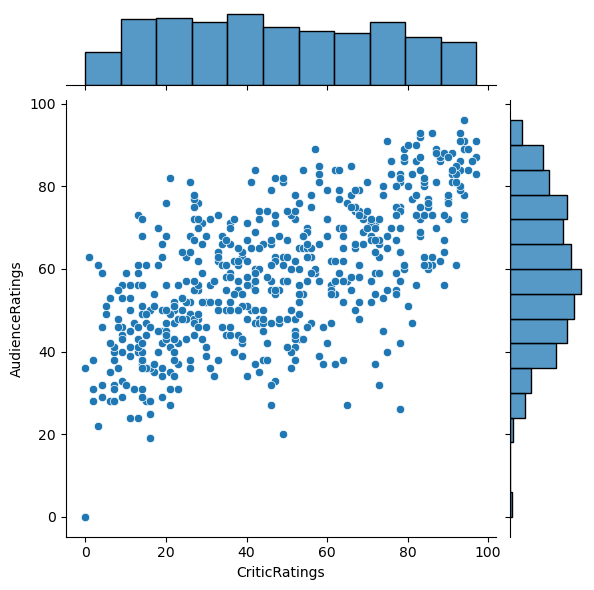

In [19]:
#It is a type of scatter plot
j = sns.jointplot(data=movies, x='CriticRatings', y='AudienceRatings') #different types of plotting done
plt.show()

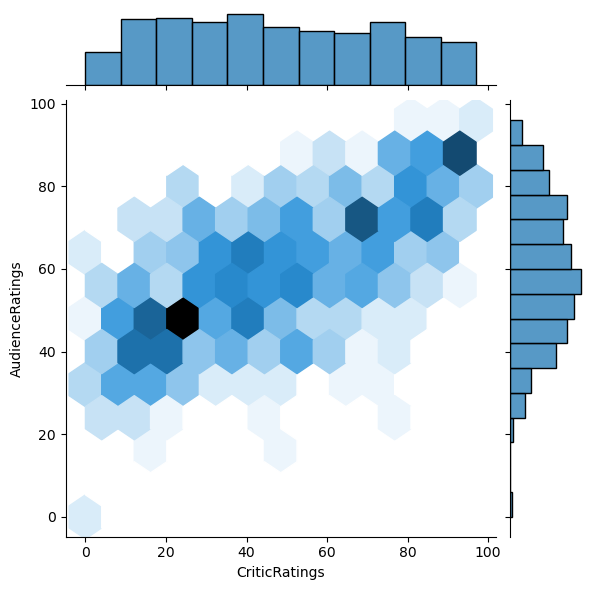

In [22]:
#Chart 1.2
#Cluster the above plotted dots
j = sns.jointplot(data=movies, x='CriticRatings', y='AudienceRatings',kind='hex')
plt.show()

In [ ]:
#Histogram
#Chart 2

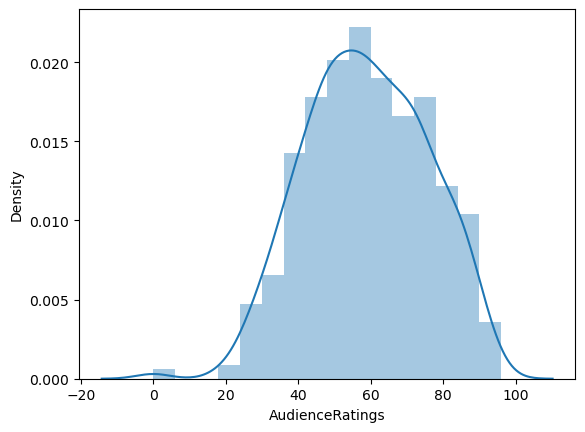

In [23]:
m1 = sns.distplot(movies.AudienceRatings, bins=16)#Audience rating is uniformally distributed, sometimes audiences like big dumb comedies, and critics don't.
plt.show()

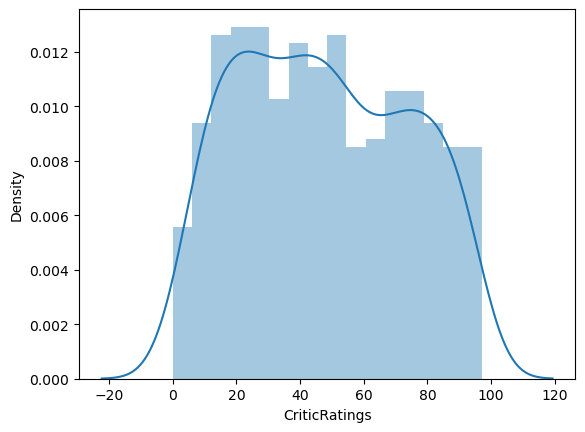

In [24]:
m2 = sns.distplot(movies.CriticRatings, bins=16)#There are a lot of factors on which the critic rating actually depends on, critic relies on the judgement, they rely on the quality of the movie by looking at the work of the director, actors, story and certain other parameters like camera work, audio, video whereas the audience does not go into that much detail,therefore we can see that critic rating is not uniformally distributed.
plt.show()

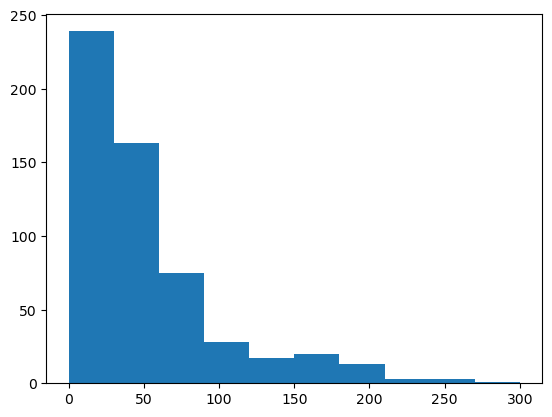

In [25]:
#Chart 3
#Plotting budget of all the movies
plt.hist(movies.BudgetMillions)
plt.show()


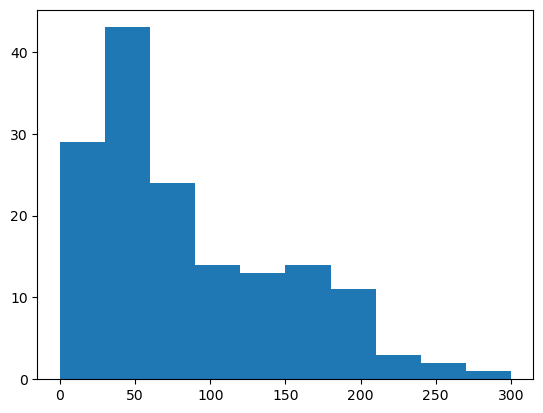

In [26]:
#Plotting budget of movies based on Genre
plt.hist(movies[movies.Genre=='Action'].BudgetMillions)
plt.show() #with action genre movies, budget varies like this

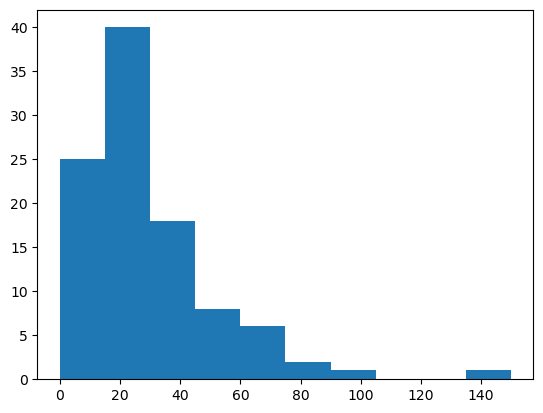

In [27]:
plt.hist(movies[movies.Genre=='Drama'].BudgetMillions)
plt.show()#with drama genre movies,budget varies like this

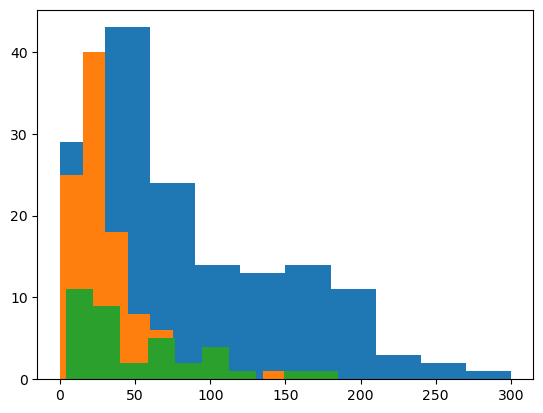

In [28]:
#Plotting all the data separately in one graph
plt.hist(movies[movies.Genre=='Action'].BudgetMillions,bins=10)
plt.hist(movies[movies.Genre=='Drama'].BudgetMillions,bins=10)
plt.hist(movies[movies.Genre=='Thriller'].BudgetMillions,bins=10)
plt.show() #combined all the 3 histograms  of action,drama and thriller movies


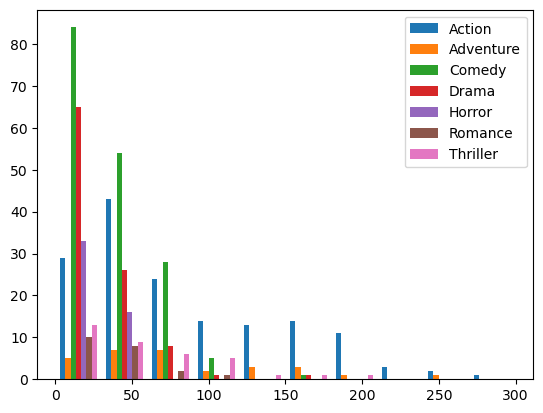

In [29]:
#Chart 4.1
list1=list()
mylabels = list()
for gen in movies.Genre.cat.categories: #for loop used to plot all the genre related budget movies
    list1.append(movies[movies.Genre==gen].BudgetMillions)
    mylabels.append(gen)
h=plt.hist(list1, label=mylabels)
plt.legend()
plt.show()

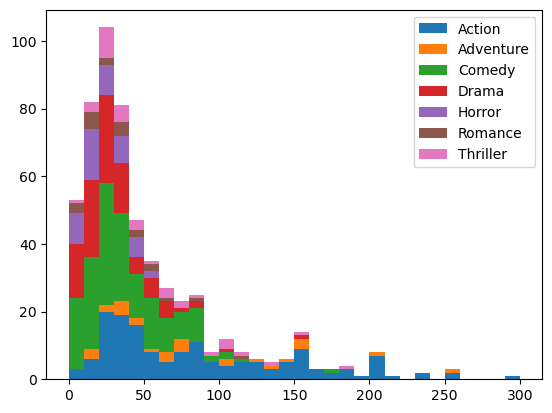

In [30]:
#Chart 4.1
list2=list()
mylabels = list()

for gen in movies.Genre.cat.categories:
    list2.append(movies[movies.Genre==gen].BudgetMillions)
    mylabels.append(gen)
h=plt.hist(list2, bins=30,stacked=True,label=mylabels)
plt.legend()
plt.show()


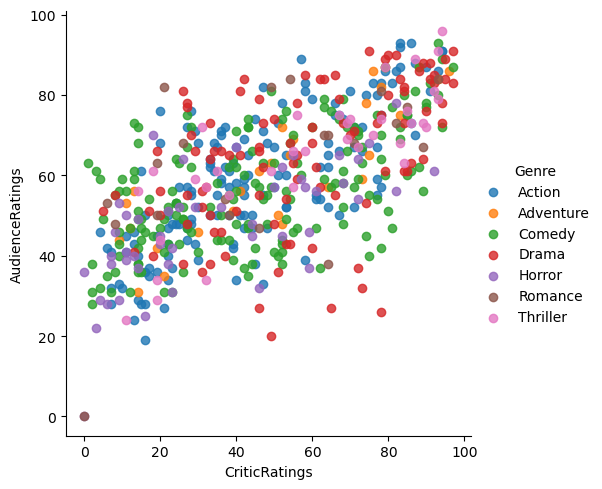

In [33]:
#Chart 5 KDE
visual = sns.lmplot(data=movies, x='CriticRatings', y='AudienceRatings', \
                    fit_reg=False,hue='Genre')# linear plotting of audience and critic ratings
plt.show()

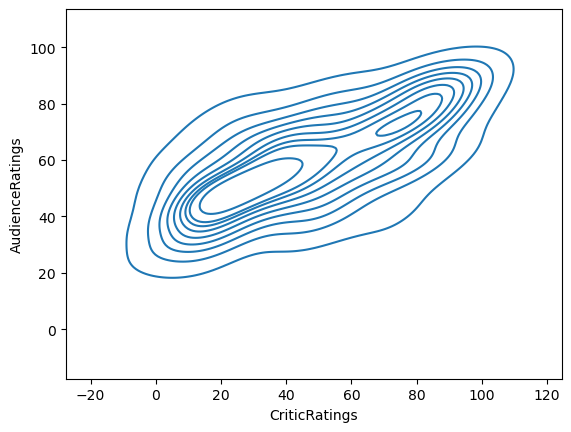

In [38]:
#KDE Plot kernel density estimate
k1=sns.kdeplot(x=movies.CriticRatings,y=movies.AudienceRatings)
plt.show()

In [ ]:
#compare density of data in above 2 

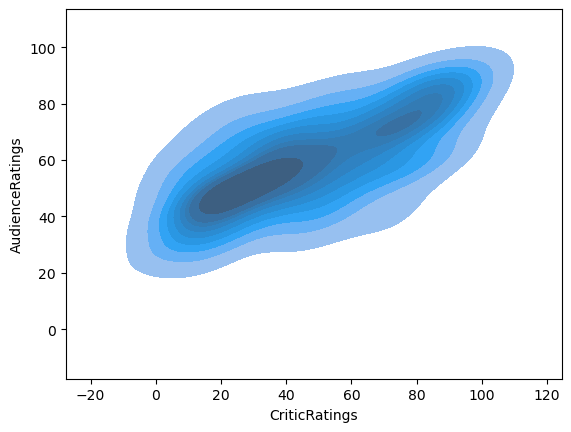

In [40]:
k1=sns.kdeplot(x=movies.CriticRatings,y=movies.AudienceRatings,shade=True)
plt.show()

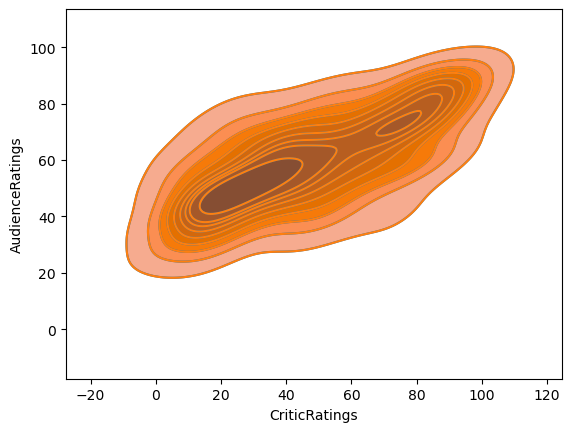

In [42]:
k1=sns.kdeplot(x=movies.CriticRatings,y=movies.AudienceRatings)
k1=sns.kdeplot(x=movies.CriticRatings,y=movies.AudienceRatings,shade=True)
plt.show()

In [ ]:
#data visulization using 6 box plot and violinplots

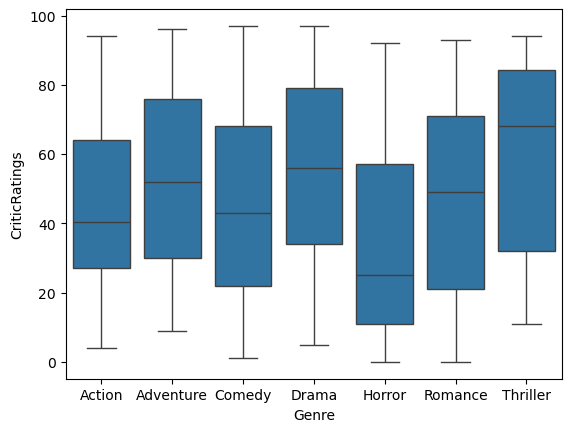

In [43]:
w = sns.boxplot(data=movies, x='Genre',y='CriticRatings')
plt.show()

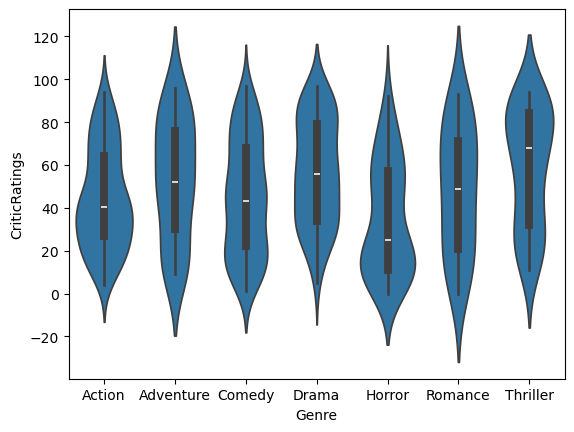

In [44]:
z=sns.violinplot(data=movies, x='Genre',y='CriticRatings')
plt.show()

In [ ]:
#data visulization using 7 Facet Grids

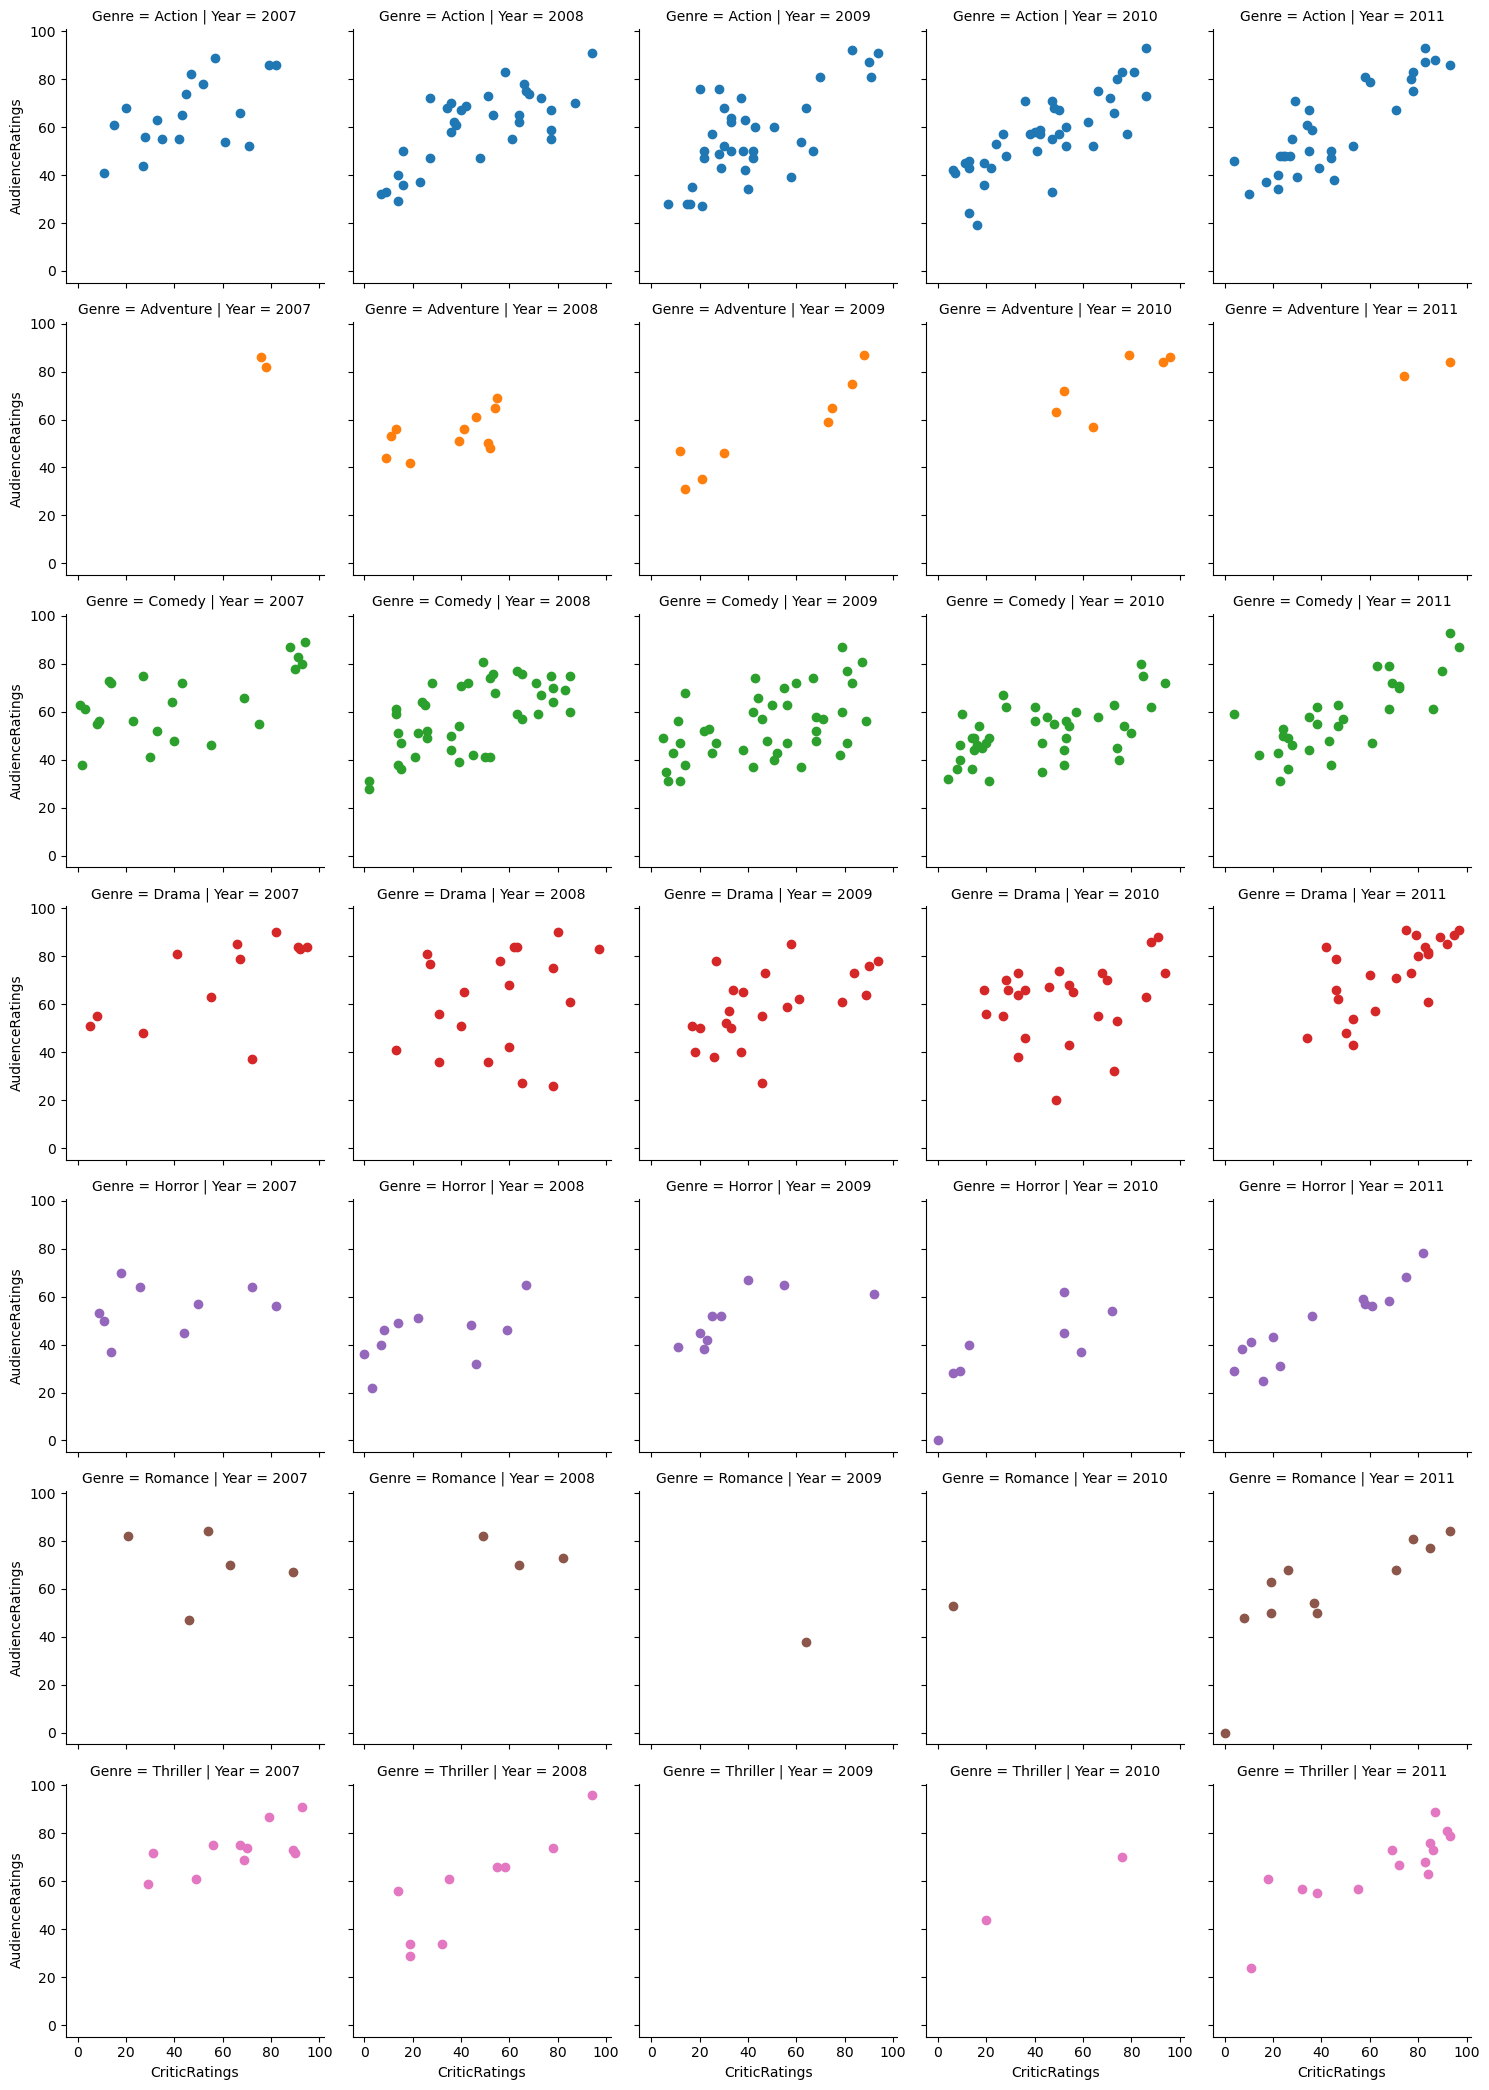

In [47]:
q=sns.FacetGrid(movies,row='Genre',col='Year', hue='Genre')
q=q.map(plt.scatter,'CriticRatings', 'AudienceRatings')
plt.show()
#Similarly different types of plots can be made